## Objetivo

Predecir  dado un cliente si se hará clic o no en un anuncio publicitario


- [x] Escalado de la data
- [x] Resolver problema datos nulos
- [x] Variables a eliminar(session_id, user_id, campaign_id, webpage_id)
- [x] Fecha a tratar
- [x] dummies a variables product
- [x] tratar el producto genero y fecha
- [x] Generar nuevas variables
- [x] Aplicacion de modelos de clasificación

###  No realizadas
- [ ] Manejos de datos no nulos
- [ ] distribuciones binomiales ver si se ocupa otra funcion de activación
- [ ] Balanceo Undersampling Oversampling
- [ ] Tratar la data del test
- [ ] Aplicar mas dummies a de todas las variables
- [ ] Let encoder para los id de las variables
- [ ] Aplicar analisis de componentes principales





In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
data = pd.read_csv('Ad_click_prediction_train.csv')


In [6]:
data

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [8]:
data.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


In [9]:
data.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

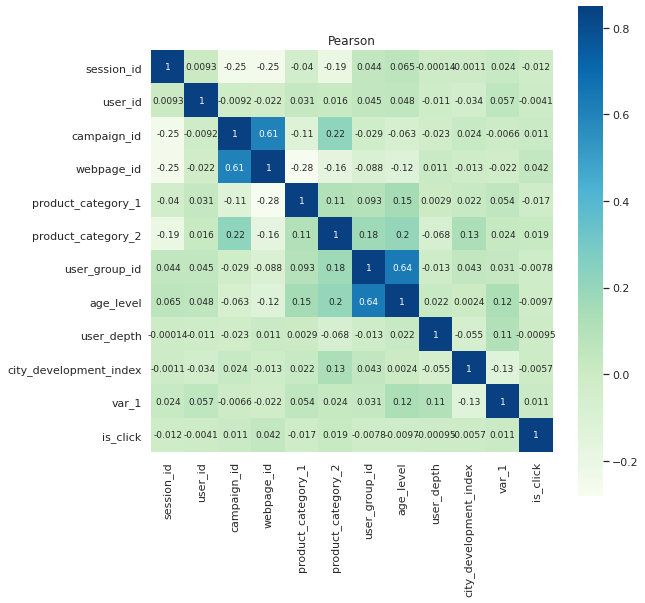

In [10]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(9,9))
plt.title('Pearson')
sns.heatmap(data.corr(),vmax=0.85, square=True,cmap='GnBu', linecolor='b',annot=True,annot_kws={"size":9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe65322e90>,
      dtype=object)

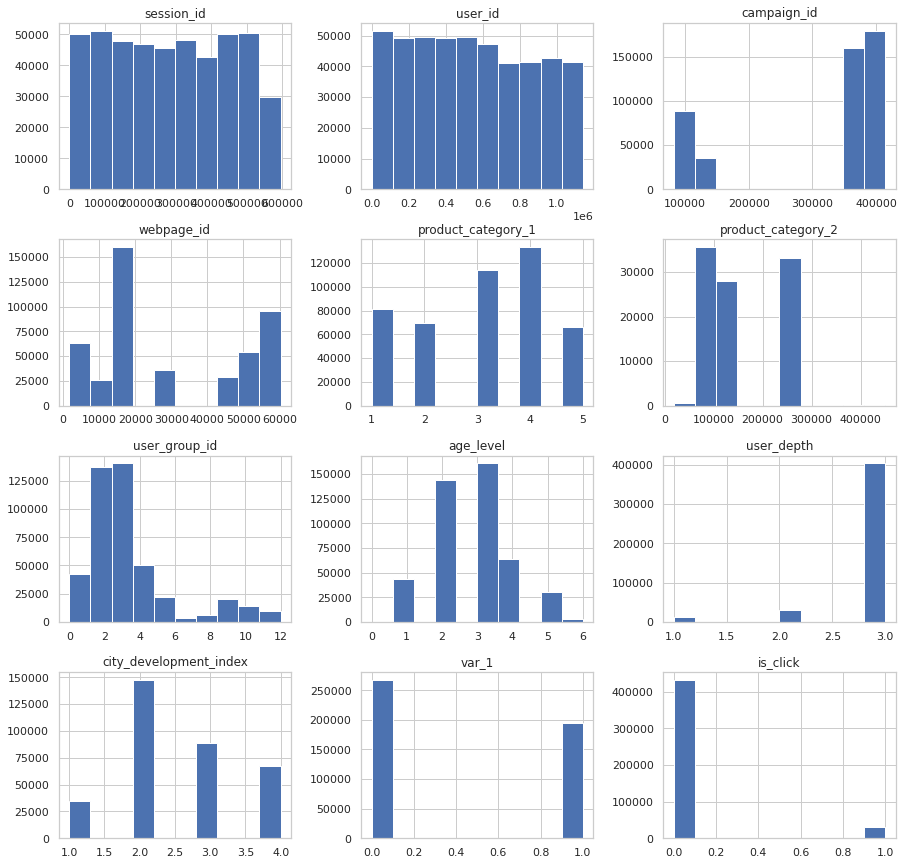

In [11]:
data.hist(figsize=(15,15))

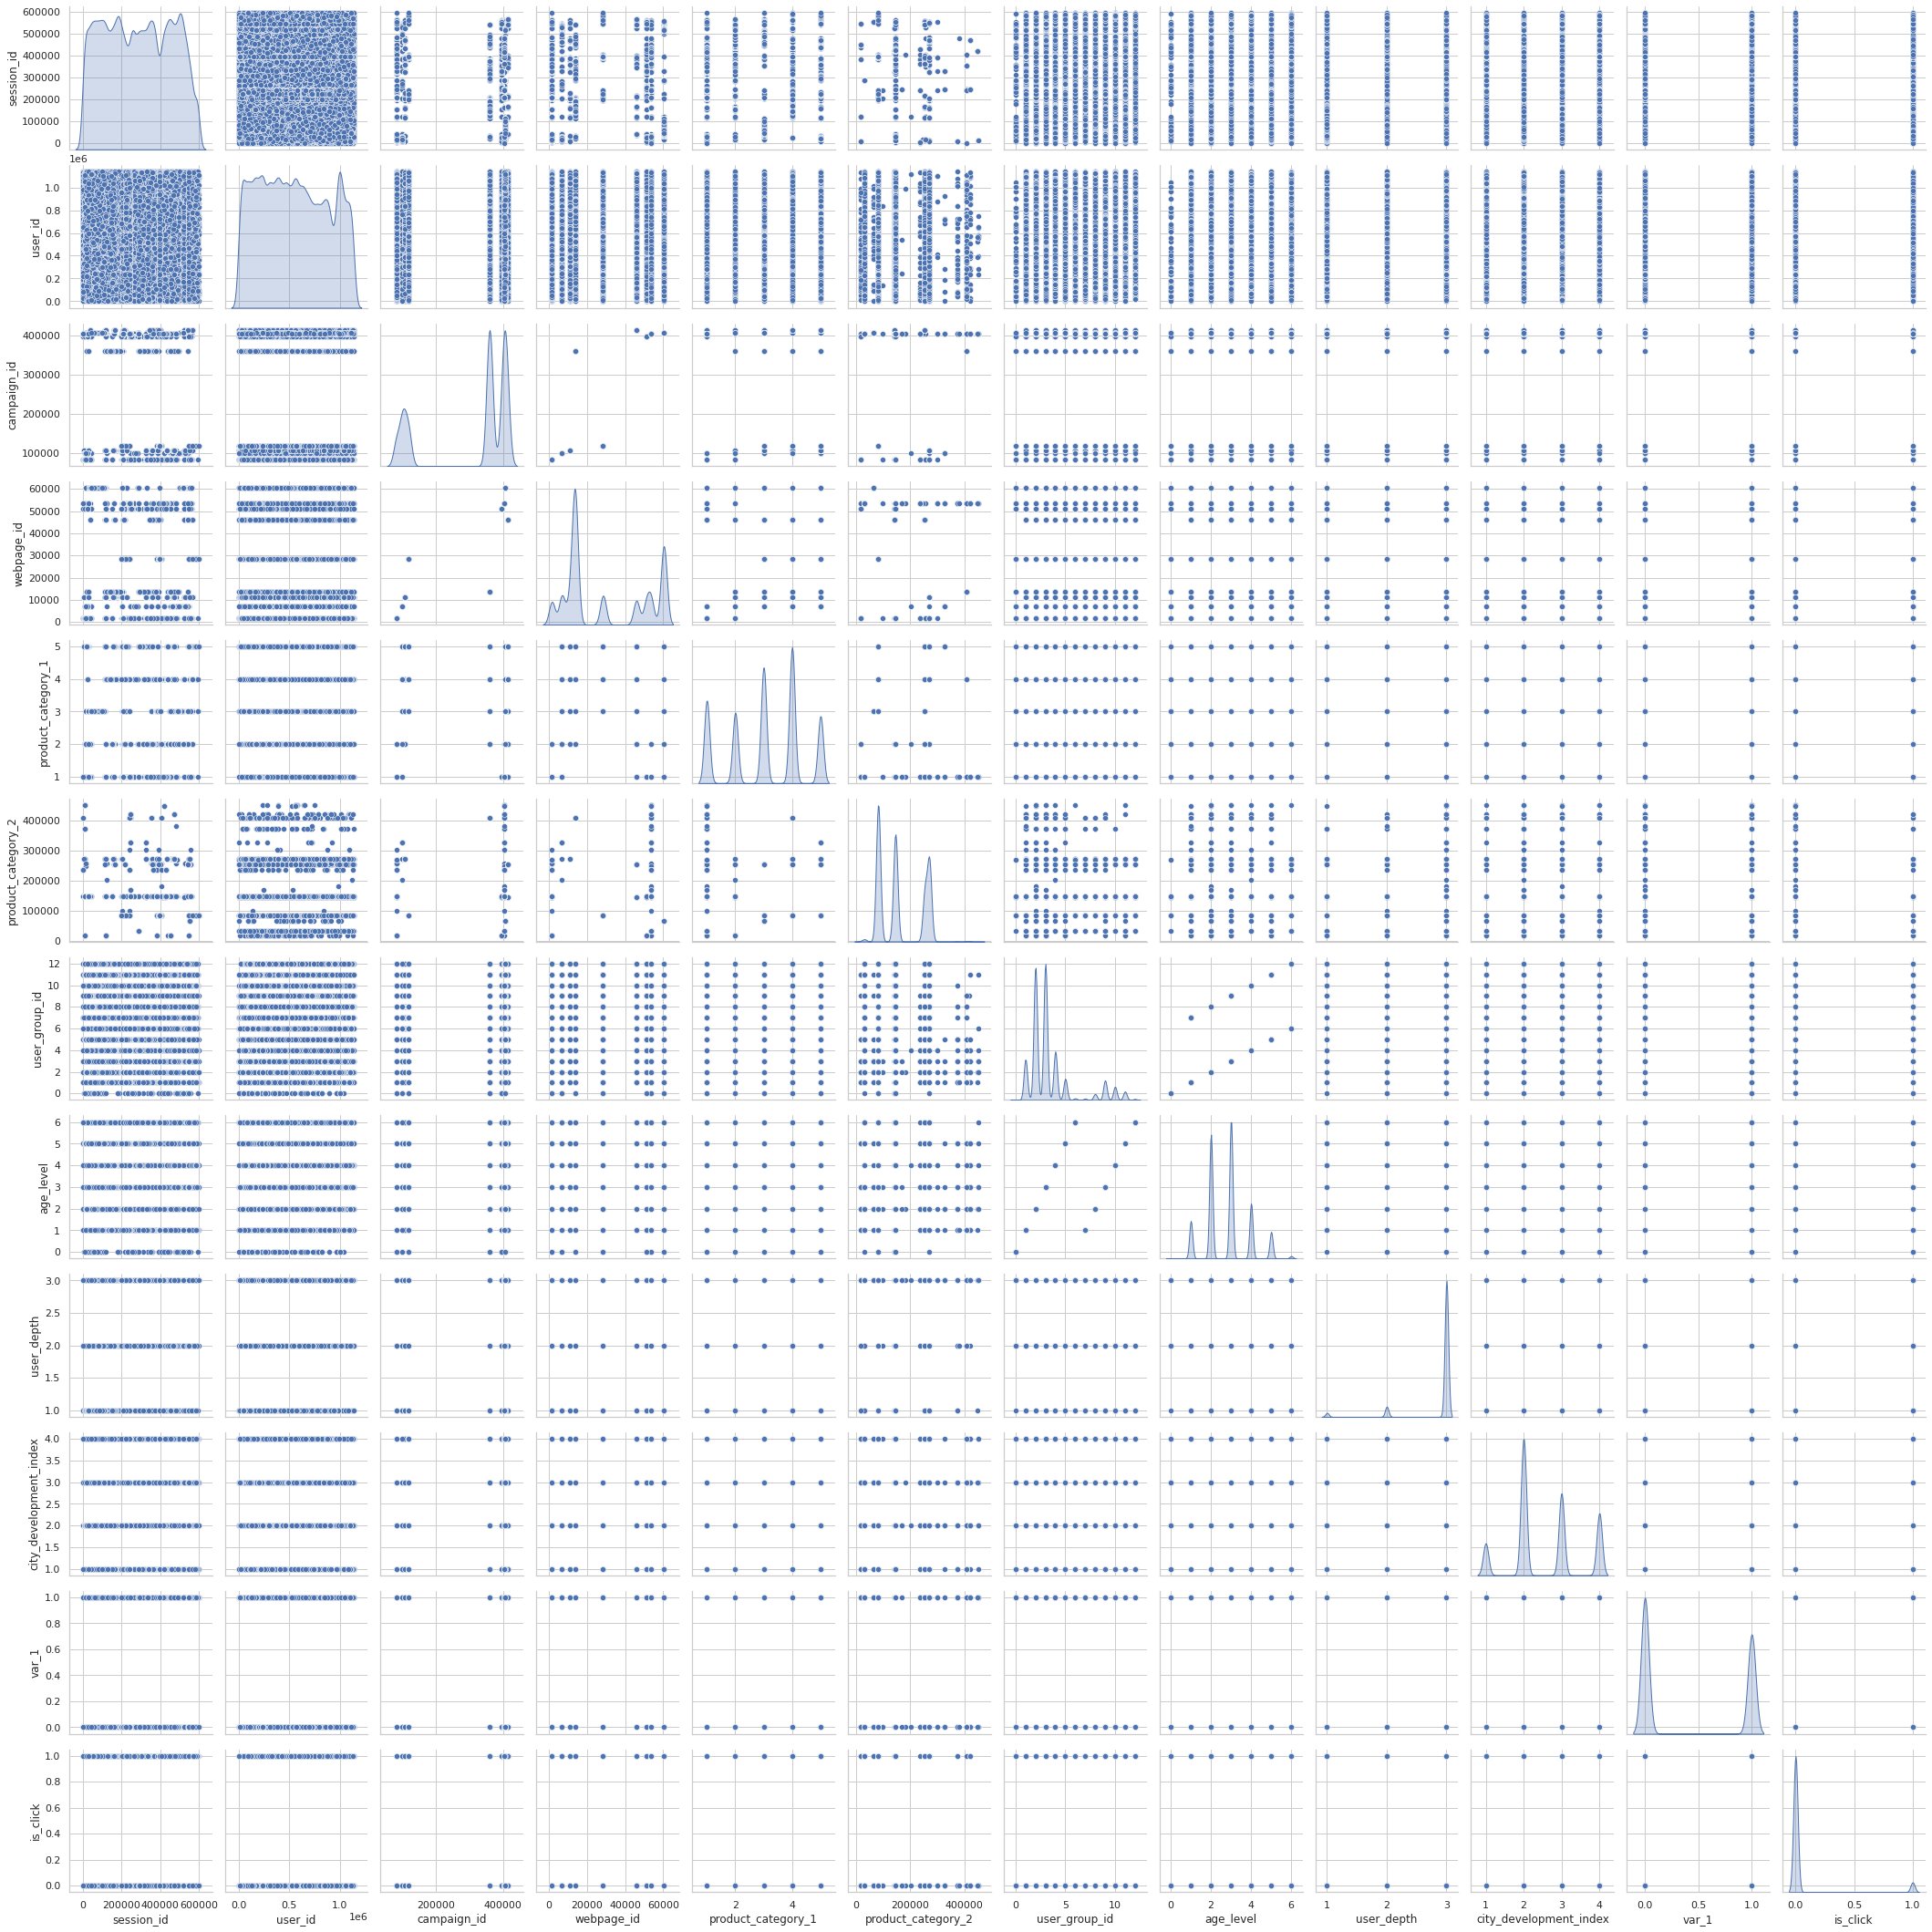

In [ ]:
sns.pairplot(data, diag_kind='kde')

In [13]:
# eliminar los datos nulos
data = data.dropna()
data.isnull().sum()

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [14]:
data.tail()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
463279,579414,2017-07-07 23:59,563083,7,118601,28529,5,82527.0,3.0,Male,3.0,3.0,2.0,0,0
463280,547394,2017-07-07 23:59,1132443,6,118601,28529,5,82527.0,3.0,Male,3.0,3.0,4.0,0,0
463281,393785,2017-07-07 23:59,12050,8,118601,28529,4,82527.0,3.0,Male,3.0,3.0,3.0,0,0
463286,583588,2017-07-07 23:59,572718,7,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,8,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0


In [15]:
le = LabelEncoder()
data['product'] =  le.fit_transform(data['product'])
data['gender'] = le.fit_transform(data['gender'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
data['DateTime']=pd.to_datetime(data['DateTime'])

data['month'] = data['DateTime'].apply(lambda date:date.month)
data['year'] = data['DateTime'].apply(lambda date:date.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [17]:
data = data.drop('DateTime',axis=1)


In [18]:
data

,session_id,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,month,year
17,2927,295456,8,404347,53587,1,146115.0,9.0,0,3.0,3.0,3.0,1,0,7,2017
21,3803,312475,8,404347,53587,1,146115.0,2.0,1,2.0,3.0,4.0,1,0,7,2017
42,2670,649512,8,404347,53587,1,146115.0,2.0,1,2.0,3.0,1.0,1,0,7,2017
48,390567,99306,7,105960,11085,5,270915.0,4.0,1,4.0,3.0,2.0,0,0,7,2017
49,381228,99306,7,105960,11085,5,270915.0,4.0,1,4.0,3.0,2.0,0,0,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463279,579414,563083,7,118601,28529,5,82527.0,3.0,1,3.0,3.0,2.0,0,0,7,2017
463280,547394,1132443,6,118601,28529,5,82527.0,3.0,1,3.0,3.0,4.0,0,0,7,2017
463281,393785,12050,8,118601,28529,4,82527.0,3.0,1,3.0,3.0,3.0,0,0,7,2017
463286,583588,572718,7,118601,28529,5,82527.0,4.0,1,4.0,3.0,2.0,0,0,7,2017


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72660 entries, 17 to 463287
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              72660 non-null  int64  
 1   user_id                 72660 non-null  int64  
 2   product                 72660 non-null  int64  
 3   campaign_id             72660 non-null  int64  
 4   webpage_id              72660 non-null  int64  
 5   product_category_1      72660 non-null  int64  
 6   product_category_2      72660 non-null  float64
 7   user_group_id           72660 non-null  float64
 8   gender                  72660 non-null  int64  
 9   age_level               72660 non-null  float64
 10  user_depth              72660 non-null  float64
 11  city_development_index  72660 non-null  float64
 12  var_1                   72660 non-null  int64  
 13  is_click                72660 non-null  int64  
 14  month                   72660 non-nu

In [20]:
df_aux = pd.get_dummies(data, prefix=['user_depth'], columns=['user_depth'])
df_aux

,session_id,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,city_development_index,var_1,is_click,month,year,user_depth_1.0,user_depth_2.0,user_depth_3.0
17,2927,295456,8,404347,53587,1,146115.0,9.0,0,3.0,3.0,1,0,7,2017,0,0,1
21,3803,312475,8,404347,53587,1,146115.0,2.0,1,2.0,4.0,1,0,7,2017,0,0,1
42,2670,649512,8,404347,53587,1,146115.0,2.0,1,2.0,1.0,1,0,7,2017,0,0,1
48,390567,99306,7,105960,11085,5,270915.0,4.0,1,4.0,2.0,0,0,7,2017,0,0,1
49,381228,99306,7,105960,11085,5,270915.0,4.0,1,4.0,2.0,0,0,7,2017,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463279,579414,563083,7,118601,28529,5,82527.0,3.0,1,3.0,2.0,0,0,7,2017,0,0,1
463280,547394,1132443,6,118601,28529,5,82527.0,3.0,1,3.0,4.0,0,0,7,2017,0,0,1
463281,393785,12050,8,118601,28529,4,82527.0,3.0,1,3.0,3.0,0,0,7,2017,0,0,1
463286,583588,572718,7,118601,28529,5,82527.0,4.0,1,4.0,2.0,0,0,7,2017,0,0,1


In [21]:
df_aux.loc[df_aux.var_1 == 0, 'var_1'] = -1

In [22]:
df_aux = df_aux.drop('month', axis=1)
df_aux = df_aux.drop('year', axis=1)

In [23]:
df_aux = df_aux.drop('user_id', axis=1)
df_aux = df_aux.drop('session_id', axis=1)

In [25]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72660 entries, 17 to 463287
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product                 72660 non-null  int64  
 1   campaign_id             72660 non-null  int64  
 2   webpage_id              72660 non-null  int64  
 3   product_category_1      72660 non-null  int64  
 4   product_category_2      72660 non-null  float64
 5   user_group_id           72660 non-null  float64
 6   gender                  72660 non-null  int64  
 7   age_level               72660 non-null  float64
 8   city_development_index  72660 non-null  float64
 9   var_1                   72660 non-null  int64  
 10  is_click                72660 non-null  int64  
 11  user_depth_1.0          72660 non-null  uint8  
 12  user_depth_2.0          72660 non-null  uint8  
 13  user_depth_3.0          72660 non-null  uint8  
dtypes: float64(4), int64(7), uint8(3)
me

In [26]:
df_aux = df_aux.astype(int)

In [27]:
df_aux

,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,city_development_index,var_1,is_click,user_depth_1.0,user_depth_2.0,user_depth_3.0
17,8,404347,53587,1,146115,9,0,3,3,1,0,0,0,1
21,8,404347,53587,1,146115,2,1,2,4,1,0,0,0,1
42,8,404347,53587,1,146115,2,1,2,1,1,0,0,0,1
48,7,105960,11085,5,270915,4,1,4,2,-1,0,0,0,1
49,7,105960,11085,5,270915,4,1,4,2,-1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463279,7,118601,28529,5,82527,3,1,3,2,-1,0,0,0,1
463280,6,118601,28529,5,82527,3,1,3,4,-1,0,0,0,1
463281,8,118601,28529,4,82527,3,1,3,3,-1,0,0,0,1
463286,7,118601,28529,5,82527,4,1,4,2,-1,0,0,0,1


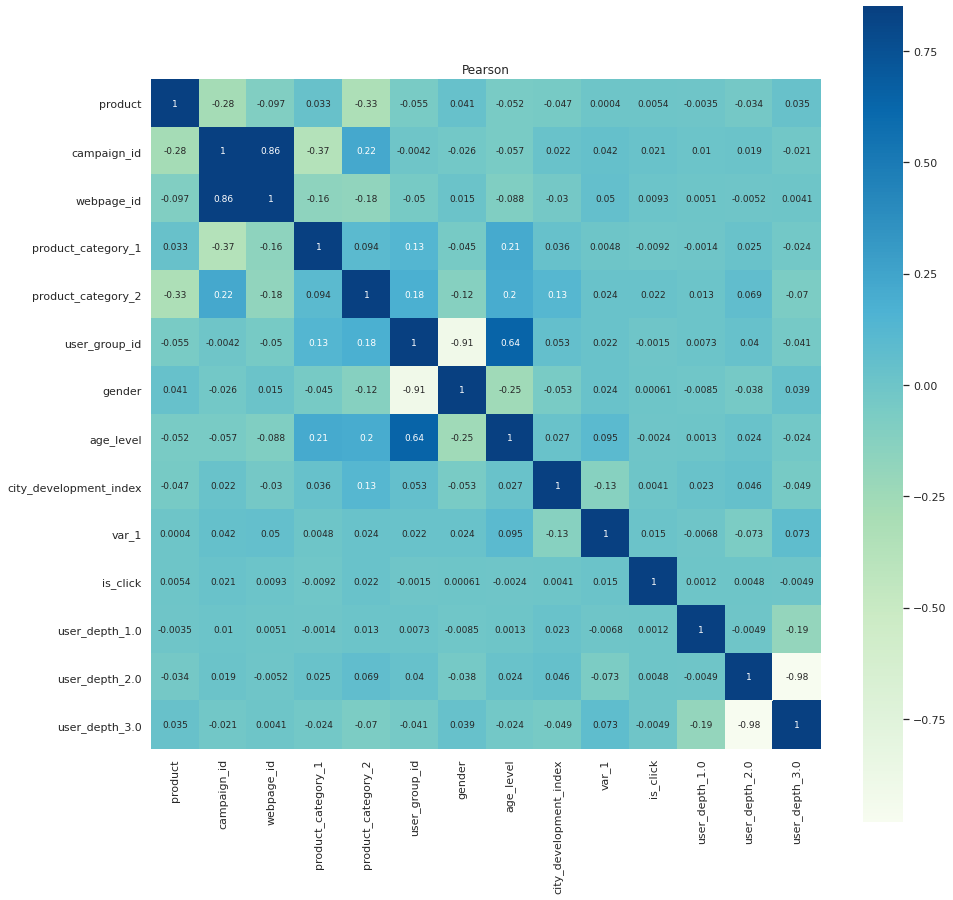

In [28]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(df_aux.corr(),vmax=0.85, square=True,cmap='GnBu', linecolor='b',annot=True,annot_kws={"size":9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe635fe050>,
      dtype=object)

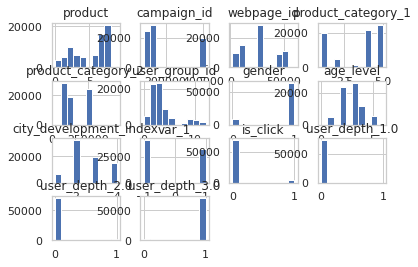

In [29]:
df_aux.hist()

In [30]:
X = df_aux.drop('is_click', axis=1)
y = df_aux['is_click']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [32]:
model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=90,verbose=1)

Epoch 1/90
5087/5087 [==============================] - 32s 2ms/step - loss: 551.8206 - accuracy: 0.8540 - val_loss: 13.9410 - val_accuracy: 0.9295
Epoch 2/90
5087/5087 [==============================] - 10s 2ms/step - loss: 40.3078 - accuracy: 0.8803 - val_loss: 40.0079 - val_accuracy: 0.9366
Epoch 3/90
5087/5087 [==============================] - 10s 2ms/step - loss: 29.6809 - accuracy: 0.8811 - val_loss: 15.2577 - val_accuracy: 0.9366
Epoch 4/90
5087/5087 [==============================] - 10s 2ms/step - loss: 16.2959 - accuracy: 0.8830 - val_loss: 5.8401 - val_accuracy: 0.9361
Epoch 5/90
5087/5087 [==============================] - 10s 2ms/step - loss: 6.9983 - accuracy: 0.8861 - val_loss: 2.3450 - val_accuracy: 0.6563
Epoch 6/90
5087/5087 [==============================] - 9s 2ms/step - loss: 0.9545 - accuracy: 0.9240 - val_loss: 0.2387 - val_accuracy: 0.9366
Epoch 7/90
5087/5087 [==============================] - 10s 2ms/step - loss: 0.2359 - accuracy: 0.9372 - val_loss: 0.2565 -

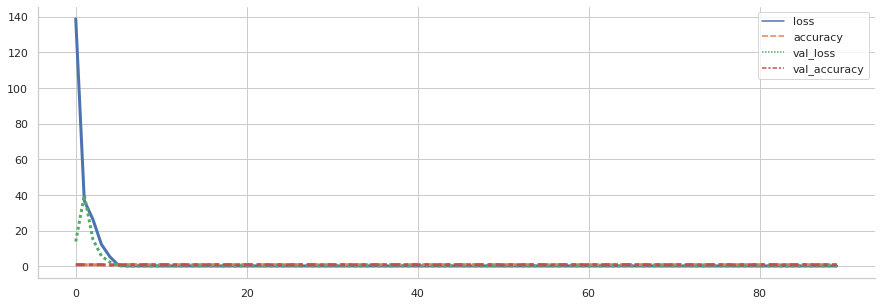

In [34]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [38]:
# KNN
error = []
for n in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train,y_train)
  predic_n = knn.predict(X_test)
  error.append(np.mean(predic_n != y_test))

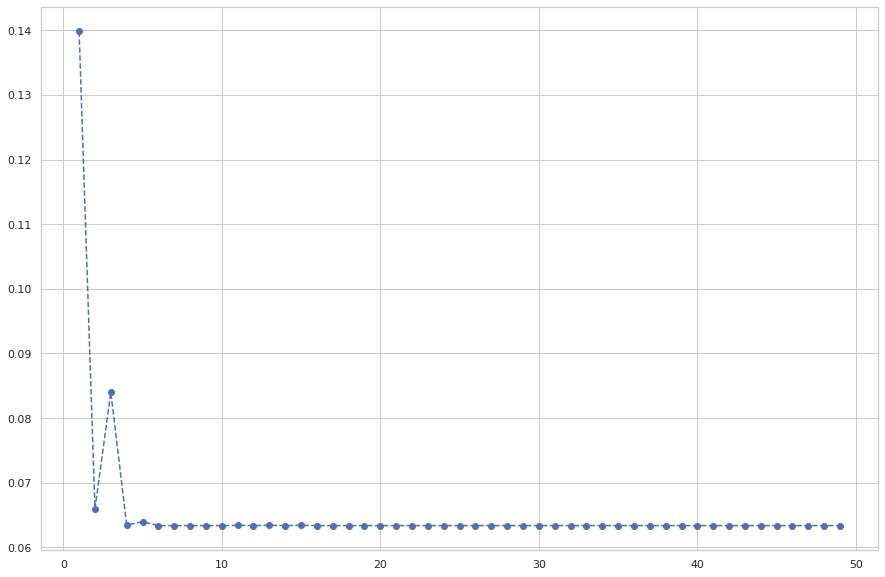

In [40]:
plt.figure(figsize=(15,10))
plt.plot(range(1,50),error,color='b',linestyle='dashed',marker='o',markerfacecolor ='b')

In [41]:
knn_c = KNeighborsClassifier(n_neighbors=6)
knn_c.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [42]:
y_pred_train = knn_c.predict(X_train)
y_pred_test = knn_c.predict(X_test)

In [43]:
print("Train ACC:",accuracy_score(y_train, y_pred_train))
print("Test ACC:" ,accuracy_score(y_test, y_pred_test))

Train ACC: 0.9369863552357359
Test ACC: 0.9366455638131939
